In [1]:
import matplotlib.pyplot as plt 
from dataloader import InsectDatamodule
import numpy as np
import torchaudio
import torch
import IPython.display as ipd

In [2]:
datamodule = InsectDatamodule(csv_paths=['../data/Cicadidae.csv', '../data/Orthoptera.csv'], batch_size=10, eval_max_len_in_seconds=1)
train_dataloader = datamodule.train_dataloader()

metadata = train_dataloader.dataset.get_metadata()

In [ ]:
# waveform, samplerate = train_dataloader.dataset.load_sample(metadata['path'][15])


# waveform.shape[1]

# torch.nn.functional.pad(waveform, pad=(waveform.shape[1]+500, 0, 0, 0))

In [13]:
def normalize(tensor):
    return (tensor - tensor.min()) / (tensor.max() - tensor.min())

# def normalize(tensor):
#     return (tensor + 40) / 40

def plot_all(path: str,
            index: int,
            n_fft: int, 
            top_db: int | None, 
            n_mels: int, 
            pad_length: int = 0, 
            show_audiosample: bool = False, 
            show_waveform: bool = False
            ):

    # loading the sample
    waveform, samplerate = train_dataloader.dataset.load_sample(path)

    # displaying the audio sample if true
    if show_audiosample:
        ipd.display(ipd.Audio(waveform.numpy()[0], rate=samplerate))


    # zero padding the waveform if needed
    if pad_length > 0:

        pad_samples = int(pad_length * samplerate)
        waveform = torch.nn.functional.pad(waveform, pad=(pad_samples, 0, 0, 0))


    # Displaying Waveform if true
    if show_waveform:

        time = np.arange(0, len(waveform[0])) / samplerate

        plt.plot(time, waveform[0, :])
        plt.title('Waveform')
        plt.xlabel('Time (s)')
        plt.show()

    # creating the mel spectrogram
    mel = torchaudio.transforms.MelSpectrogram(n_fft=n_fft, 
                                            hop_length=int(n_fft/2), 
                                            win_length=n_fft, 
                                            n_mels=n_mels
                                            )(waveform)

    # transforming the mel spectrogram with amplitude to db
    mel_db = torchaudio.transforms.AmplitudeToDB(top_db=top_db)(mel)

    # normalizing the transformed mel spectrogram
    mel_db_norm = normalize(mel_db)

    # creating the spectrogram
    spec = torchaudio.transforms.Spectrogram(n_fft=n_fft, 
                                            hop_length=int(n_fft/2), 
                                            win_length=n_fft
                                            )(waveform)

    # transforming the spectrogram with amplitude to db
    spec_db = torchaudio.transforms.AmplitudeToDB(top_db=top_db)(spec)

    # normalizing the transformed spectrogram
    spec_db_norm = normalize(spec_db)

    # #setting up the plot
    # fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    # # plotting subplots
    # ax[0, 0].imshow(mel.numpy().squeeze(), origin='lower', aspect='auto')
    # ax[0, 0].set_title('Mel spectrogram')
    # fig.colorbar(ax[0, 0].imshow(mel.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[0, 0])

    # ax[0, 1].imshow(mel_db.numpy().squeeze(), origin='lower', aspect='auto')
    # ax[0, 1].set_title('Mel spectrogram (db)')
    # fig.colorbar(ax[0, 1].imshow(mel_db.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[0, 1])

    # ax[0, 2].imshow(mel_db_norm.numpy().squeeze(), origin='lower', aspect='auto')
    # ax[0, 2].set_title('Mel spectrogram (db) normalized')
    # fig.colorbar(ax[0, 2].imshow(mel_db_norm.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[0, 2])

    # ax[1, 0].imshow(spec.numpy().squeeze(), origin='lower', aspect='auto')
    # ax[1, 0].set_title('Spectrogram')
    # fig.colorbar(ax[1, 0].imshow(spec.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[1, 0])

    # ax[1, 1].imshow(spec_db.numpy().squeeze(), origin='lower', aspect='auto')
    # ax[1, 1].set_title('Spectrogram (db)')
    # fig.colorbar(ax[1, 1].imshow(spec_db.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[1, 1])

    # ax[1, 2].imshow(spec_db_norm.numpy().squeeze(), origin='lower', aspect='auto')
    # ax[1, 2].set_title('Spectrogram (db) normalized')
    # fig.colorbar(ax[1, 2].imshow(spec_db_norm.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[1, 2])

    #setting up the plot
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # plotting subplots
    ax[0].imshow(spec_db_norm.numpy().squeeze(), origin='lower', aspect='auto')
    ax[0].set_title('Spectrogram')
    fig.colorbar(ax[0].imshow(spec_db_norm.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[0])

    ax[1].imshow(mel_db_norm.numpy().squeeze(), origin='lower', aspect='auto')
    ax[1].set_title('Mel spectrogram')
    fig.colorbar(ax[1].imshow(mel_db_norm.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[1])

    # creating a legend:
    text = f'sample_index: {index}, n_fft: {n_fft}, n_mels: {n_mels}, top_db: {top_db}'

    # displaying the plot
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # adjust the bottom margin
    plt.text(0.02, 0.1, text, ha='left', va='top', transform=fig.transFigure)
    
    return fig

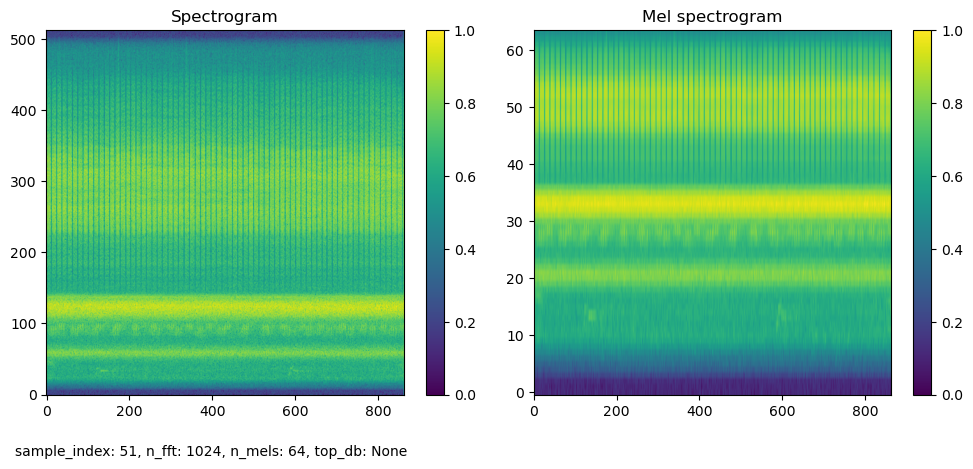

In [21]:
# setting up the parameters
index=51
n_fft = 1024
n_mels = 64
top_db = None
pad_length = 0
show_audiosample = False
show_waveform = False

path = metadata['path'][index]

fig = plot_all(path=path,
        index=index,
        n_fft=n_fft, 
        top_db=top_db, 
        n_mels=n_mels, 
        pad_length=pad_length, 
        show_audiosample=show_audiosample, 
        show_waveform=show_waveform)


In [16]:
l_index = [12, 26, 33, 48, 55, 69]
l_n_fft = [128, 256, 512, 1024]
l_n_mels = [32, 64, 128]
l_top_db = [None, 100, 80, 60]

for index in l_index:
    for n_fft in l_n_fft:
        for n_mels in l_n_mels:
            for top_db in l_top_db:
                fig = plot_all(path=metadata['path'][index],
                        index=index,
                        n_fft=n_fft, 
                        top_db=top_db, 
                        n_mels=n_mels, 
                        pad_length=0, 
                        show_audiosample=False, 
                        show_waveform=False)

                fig.savefig(f'./figures/id{index}-n_fft{n_fft}-n_mels{n_mels}-top_db{top_db}.png')
                plt.close(fig)